In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

import itertools

In [12]:
df=pd.read_csv('../data/hmnist_28_28_RGB.csv')
print(f'num of data: {len(df)}')
df.head(5)

num of data: 10015


,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2


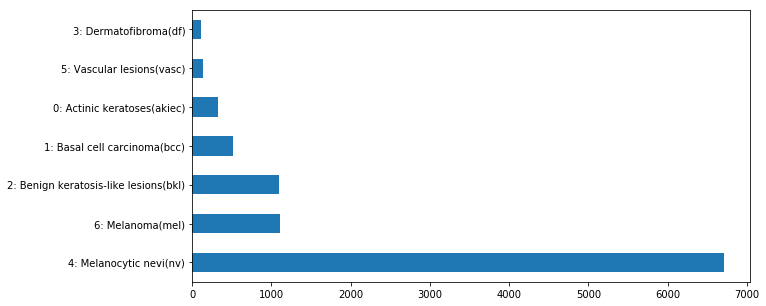

In [13]:
lesion_type_dict = {
    0: '0: Actinic keratoses(akiec)',
    1: '1: Basal cell carcinoma(bcc)',
    2: '2: Benign keratosis-like lesions(bkl)',
    3: '3: Dermatofibroma(df)',
    4: '4: Melanocytic nevi(nv)',
    5: '5: Vascular lesions(vasc)',   
    6: '6: Melanoma(mel)',
}

df['lesion_type'] = df['label'].map(lesion_type_dict)

fig, ax = plt.subplots(1, 1, figsize= (10, 5))
_ = df['lesion_type'].value_counts().plot(kind='barh', ax=ax)
ax.grid(False)

In [14]:
df_2 = df[(df['label']==2)]
df_4 = df[(df['label']==4)][0:1100]
df_6 =df[(df['label']==6)]
df_246 = pd.concat([df_2, df_4, df_6])
print(f'num of data: {len(df_246)}')

num of data: 3312


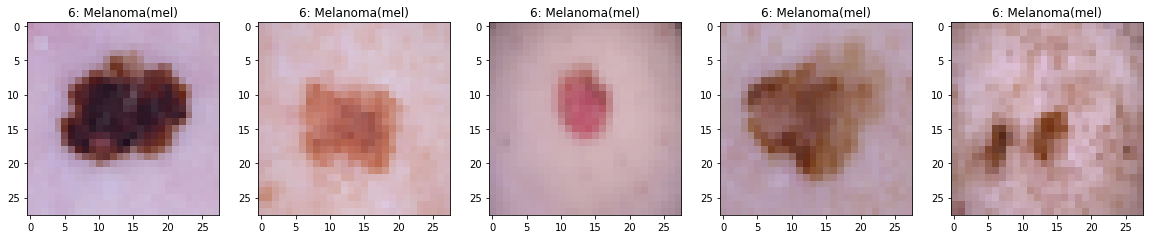

In [19]:
def plot_skin_cancer(df, label_num):
    data = df[(df['label']==label_num)].sample(5).iloc[:,:-2].values.reshape((5,28,28,3))
    fig, ax = plt.subplots(1, 5, figsize=(20,5))
    for i in range(len(data)):
        ax[i].imshow(data[i])
        ax[i].set_title(lesion_type_dict.get(label_num))
        ax[i].grid(False)
    plt.show()
    
plot_skin_cancer(df, label_num = 6)

In [6]:
train, test = train_test_split(df_246, test_size=0.2, stratify=df_246['label'], random_state = 1)

In [20]:
train

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label,lesion_type
448,142,116,122,155,127,131,164,135,140,172,...,144,153,166,135,145,158,129,142,2,2: Benign keratosis-like lesions(bkl)
3431,213,125,120,202,116,108,187,104,100,194,...,100,96,189,107,105,188,109,106,4,4: Melanocytic nevi(nv)
1979,232,171,184,234,174,192,229,164,174,217,...,133,140,149,110,122,122,90,104,6,6: Melanoma(mel)
176,133,103,115,161,132,137,179,147,146,188,...,168,181,184,151,160,168,136,154,2,2: Benign keratosis-like lesions(bkl)
335,208,185,199,210,183,200,210,181,200,211,...,140,140,155,132,132,131,101,98,2,2: Benign keratosis-like lesions(bkl)
3351,218,137,128,221,139,129,226,145,134,229,...,157,146,216,151,136,212,149,140,4,4: Melanocytic nevi(nv)
3772,193,83,93,197,88,94,200,90,94,205,...,105,100,190,101,96,187,97,92,4,4: Melanocytic nevi(nv)
791,118,78,109,125,84,121,131,85,121,139,...,103,142,137,85,124,122,75,109,2,2: Benign keratosis-like lesions(bkl)
413,144,103,105,148,107,108,163,131,134,167,...,160,159,177,147,144,176,150,150,2,2: Benign keratosis-like lesions(bkl)
3692,243,169,169,246,172,171,251,176,177,251,...,174,171,230,168,163,226,164,158,4,4: Melanocytic nevi(nv)


In [7]:
x_train = []
for i in range(len(train)):
    x_train.append(train.iloc[i,:-2].values)
x_train = np.stack( x_train, axis=0 ).astype('float32')


x_test = []
for i in range(len(test)):
    x_test.append(test.iloc[i,:-2].values)
x_test = np.stack( x_test, axis=0 ).astype('float32')

y_train = train.iloc[:,-2].values

y_test = test.iloc[:,-2].values


## random forest를 적용해보자

In [21]:
x_train.shape
x_test.shape

(663, 2352)

In [56]:
# x_train = x_train.reshape(2649,2352)
# x_test = x_test.reshape(663, 2352)

In [22]:
len(x_train)

2649

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [24]:
clf = RandomForestClassifier(n_estimators=300, random_state=11, oob_score= True, n_jobs=-1)

In [25]:
clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1,
            oob_score=True, random_state=11, verbose=0, warm_start=False)

In [26]:
clf.oob_score_

0.7716119290298226

In [27]:
prediction = clf.predict(x_test)

In [28]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           2       0.76      0.68      0.72       220
           4       0.91      0.96      0.94       220
           6       0.74      0.78      0.76       223

   micro avg       0.81      0.81      0.81       663
   macro avg       0.80      0.81      0.80       663
weighted avg       0.80      0.81      0.80       663



In [29]:
clf.score(x_test, y_test)#len([i for i, j in zip(y_test, prediction) if np.all(i == j)])/len(y_test)

0.8069381598793364

In [15]:
print(classification_report([0, 0, 1, 1, 1, 0], [0, 1, 1, 0, 0, 0]))

              precision    recall  f1-score   support

           0       0.50      0.67      0.57         3
           1       0.50      0.33      0.40         3

   micro avg       0.50      0.50      0.50         6
   macro avg       0.50      0.50      0.49         6
weighted avg       0.50      0.50      0.49         6



feature 중요도

In [16]:
clf.feature_importances_

array([0.0052685 , 0.00030825, 0.00043472, ..., 0.00155393, 0.00018698,
       0.00015279])

In [17]:
np.argmax(clf.feature_importances_)

78

In [18]:
clf.feature_importances_[78]

0.008916661656601585

## 같은 상황에서 pasting을 적용해보자.

In [84]:
clf = RandomForestClassifier(n_estimators=300, random_state=11, bootstrap=False , n_jobs=-1)

In [85]:
clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1,
            oob_score=False, random_state=11, verbose=0, warm_start=False)

In [86]:
prediction = clf.predict(x_test)

In [87]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

         0.0       0.75      0.65      0.70       220
         1.0       0.91      0.95      0.93       220
         2.0       0.72      0.78      0.75       223

   micro avg       0.80      0.80      0.80       663
   macro avg       0.79      0.80      0.79       663
weighted avg       0.79      0.80      0.79       663



In [88]:
clf.score(x_test, y_test)

0.7963800904977375

## 엔트로피를 이용해보자

In [89]:
clf = RandomForestClassifier(n_estimators=300, criterion='entropy', random_state=1, n_jobs=-1)

In [90]:
clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [91]:
clf.score(x_test, y_test)

0.8024132730015083

## 랜덤 패치

In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

In [76]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(splitter="random"), n_estimators=300, random_state=11, max_samples=1.0, bootstrap=True, n_jobs=-1,
                            bootstrap_features=True)

In [77]:
y_train.shape

(2649,)

label을 list로 했을 때 Error발생!

In [78]:
bag_clf.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='random'),
         bootstrap=True, bootstrap_features=True, max_features=1.0,
         max_samples=1.0, n_estimators=300, n_jobs=-1, oob_score=False,
         random_state=11, verbose=0, warm_start=False)

In [79]:
prediction = bag_clf.predict(x_test)

In [80]:
clf.score(x_test, y_test)

0.803921568627451

In [74]:
y_train = train.iloc[:,-1].values
y_train = (y_train/2)-1

y_test = test.iloc[:,-1].values
y_test = (y_test/2)-1